<a href="https://colab.research.google.com/github/nikita30panwar/machine-learning/blob/main/Assignments/Nikita_Panwar_801372070_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q.1.a**Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training.  Also, report your results, including accuracy, precision, and recall. Plot the confusion matrix representing your binary classifier.
>


**Q.1b** How about adding a weight penalty here, considering the number of parameters? Add the weight penalty and repeat the training and report the results.

In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


from sklearn import datasets

In [464]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
print(Y.shape)


(569, 30)
(569,)


In [465]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [466]:
labels = np.reshape(Y,(569,1))
final_breast_data = np.concatenate([X,labels], axis = 1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [467]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, Y, train_size=0.8, test_size=0.2,random_state = 0)
print(Y.shape)

(569,)


In [468]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [469]:
#logistic regression
classifier = LogisticRegression(random_state=0, penalty = "none")
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', random_state=0)

In [470]:
Y_pred = classifier.predict(X_test)

In [471]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[45,  2],
       [ 3, 64]])

In [472]:
#matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9696969696969697
Recall: 0.9552238805970149


Text(0.5, 427.9555555555555, 'Predicted label')

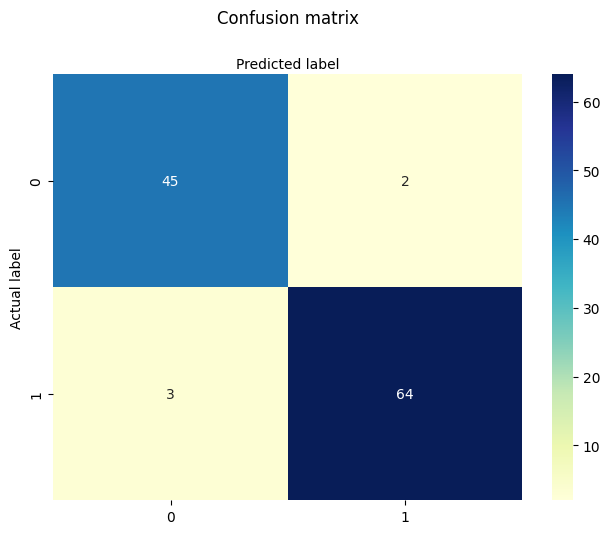

In [473]:
import seaborn as sns
# name of classes
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **WITH PENALTY**

In [474]:
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [475]:
#confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[45,  2],
       [ 2, 65]])

In [476]:
#printing 3 matrices
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 427.9555555555555, 'Predicted label')

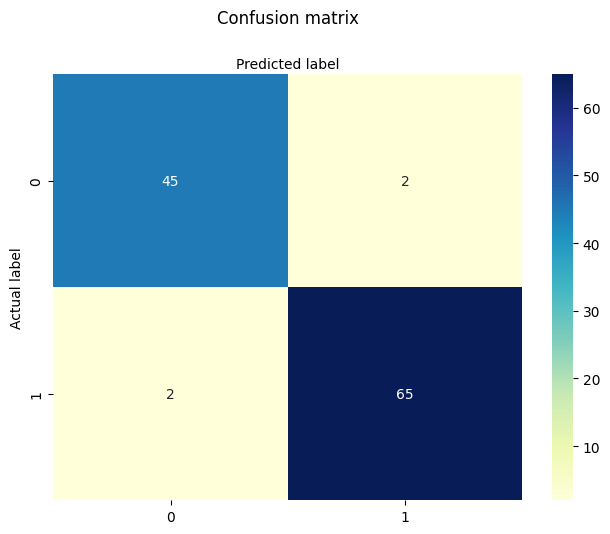

In [477]:
import seaborn as sns
# name of classes
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **REPORT**
Here we are using Brest Cancer Dataset. Splitting the dataset into 80% and 20% split between training and evaluation. Also performing scaling and standardization before training.

1.We get accuracy of 95%, Precision of 96% & recall of 95%.

>


**Accuracy**: 0.956140350877193 **Precision**: 0.9696969696969697 **Recall**: 0.9552238805970149

2.While with **penalty** We get accuracy of 96%, Precision of 97% & recall of 97%.

>


**Accuracy:** 0.9649122807017544
**Precision:** 0.9701492537313433
**Recall:** 0.9701492537313433

---


---




#Q.2
**2a.** Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test).

>
**Q.2b** Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results, comparing your results against the logistic regression classifier you did in Problem 2.



In [478]:
# random state =60 gives highest accuracy, =0 gives lowest, =80 gives lower than =60
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, Y, train_size=0.8, test_size=0.2, random_state = 60)

In [479]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better
sc_X1 = StandardScaler()
X_train = sc_X1.fit_transform(X_train)
X_test = sc_X1.transform(X_test)


In [480]:
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [481]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.96      0.96      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[37  3]
 [ 3 71]]


Text(0.5, 427.9555555555555, 'Predicted label')

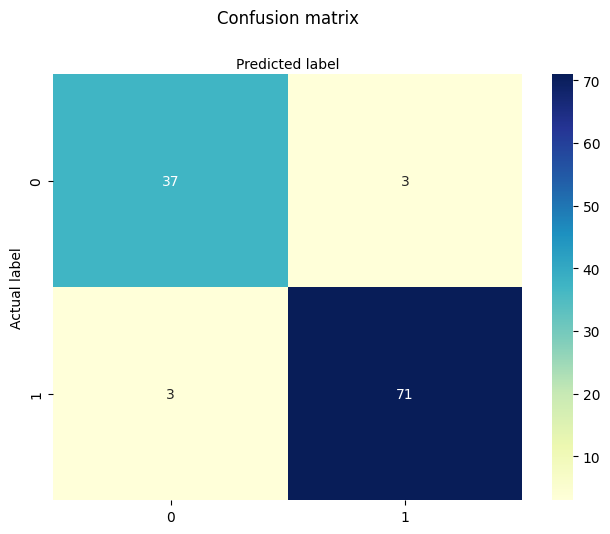

In [482]:
# name of classes
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cnf_matrix = confusion_matrix(yTest,pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [483]:
# print all 4
print("Accuracy:",metrics.accuracy_score(yTest, pred))
print("Precision:",metrics.precision_score(yTest, pred))
print("Recall:",metrics.recall_score(yTest, pred))
print("f1 score:",metrics.f1_score(yTest, pred))

Accuracy: 0.9473684210526315
Precision: 0.9594594594594594
Recall: 0.9594594594594594
f1 score: 0.9594594594594594


**Report:**

We get reduced accuracy of 94%, Precision of 95% & recall of 96%. while in logistic regression, accuracy, precision, recall was high.

**Accuracy:** 0.9473684210526315
**Precision:** 0.9594594594594594
**Recall:** 0.9594594594594594
**f1 score:** 0.9594594594594594

# **Q.3**
**3a.**  Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy.

**3b.**  Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare them against problems 1 and 2.

In [484]:
# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(X)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3','PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ])

In [485]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10', 'PC 11'])
# n=11 gives the best accuracy

In [486]:
# pca = PCA(n_components=12)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents
# , columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' ])

In [487]:
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3','PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' , 'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20'])

In [488]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state=60)

In [489]:
# scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [490]:
# logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [491]:
Y_pred = classifier.predict(X_test)

In [492]:
# confusion matrix-
cnf_matrix = confusion_matrix(Y_test, Y_pred)

cnf_matrix

array([[39,  1],
       [ 2, 72]])

In [505]:
# print all 3
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("f1 score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9863013698630136
Recall: 0.972972972972973
f1 score: 0.979591836734694


Text(0.5, 427.9555555555555, 'Predicted label')

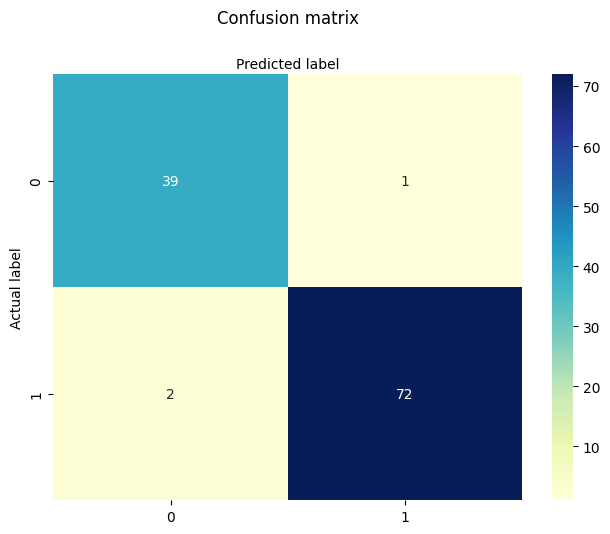

In [494]:
# plotting cnf
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# REPORT:
In this problem we are using same dataset but doing logistic regression model with PCA feature extraction, for different values of N.
N=11 gave the best highest classification accuracy & the results were as follows-

**Accuracy:** 0.9736842105263158
**Precision:** 0.9863013698630136
**Recall:** 0.972972972972973
**F1 score:** 0.979591836734694

On comparing with above results, PCA feature extraction provided the higest/improved values for all four parameters.



---



---



# **Q.4**

 Can you repeat problem 3? This time, replace the logistic regression with Bayesian classifier. Report your results (classification accuracy, precision, recall, and F1 score). Compare your results against problems 1, 2 and 3.

In [495]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,
'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ])

In [496]:
# pca = PCA(n_components=11)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3','PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11']

In [497]:
# pca = PCA(n_components=12)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents
# , columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' ])

In [498]:
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3','PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' , 'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20'])

In [499]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state=60)

In [500]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [501]:
model=GaussianNB()
model.fit(X_train,Y_train)
print(model)

GaussianNB()


In [502]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[38  2]
 [ 2 72]]


Text(0.5, 427.9555555555555, 'Predicted label')

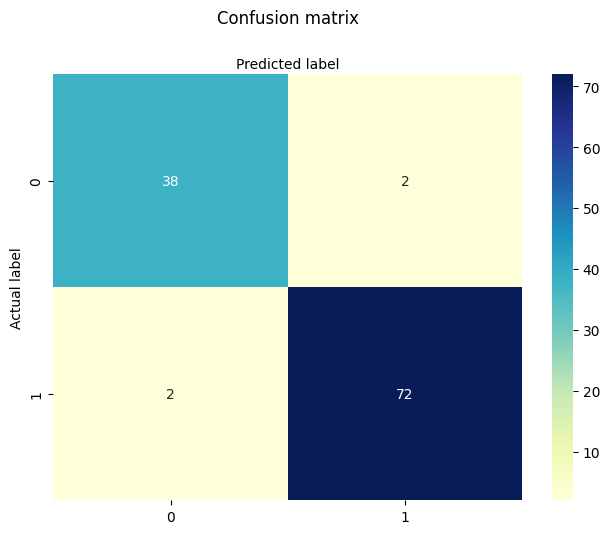

In [503]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cnf_matrix = confusion_matrix(yTest,pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [504]:
# print all 3
print("Accuracy:",metrics.accuracy_score(yTest, pred))
print("Precision:",metrics.precision_score(yTest, pred))
print("Recall:",metrics.recall_score(yTest, pred))

Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.972972972972973


# **REPORT:**

It can be observed that PCA works better with LR than with NB. though precision and recall are almost same but accuracy decreased by 0.01%.

**Accuracy:** 0.9649122807017544
**Precision:** 0.972972972972973
**Recall:** 0.972972972972973
